In [1]:
# Loading
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
%matplotlib inline

# 1. Input data

## 1.1 Import Pareto optimal results

In [2]:
# Enter objective functions for optimised results
obj1 = pd.read_pickle("Data/obj1")
obj1name = obj1.name
obj2 = pd.read_pickle("Data/obj2")
obj2name = obj2.name
obj3 = pd.read_pickle("Data/obj3")
obj3name = obj3.name

# Enter objective function dataframe
objdf = pd.read_pickle("Data/objdf")

# Objective names for charts (including arrows for direction of preference)
obj1chartname = 'Minimum Storage (GL) %s' % r'$\longrightarrow$'
obj2chartname = '%s Total Cost (%s million)' % (r'$\longleftarrow$', r'$\$$')
obj3chartname = '%s Total Spill (GL)' % r'$\longleftarrow$'

Import 1-normalised objective 3 for decision map

In [19]:
onenormobj3 = pd.read_pickle("Data/onenormobj3")

# 2. Function to determine maximum trade off (e.g. tradeof obj1, tradefor obj2)

In [3]:
def tradeoff(dataframe, tradeofname, tradeforname, ascending=True):
# index and ix are different. We wish to preserve the original index values of the unsorted dataframe
# Index helps us to cycle through an order of rows (e.g. 0th to 199th)
# ix refers to the original rows/decision options of the unsorted dataframe 
    df = pd.DataFrame.from_items([(tradeofname, dataframe[tradeofname]), (tradeforname, dataframe[tradeforname])])
    df = df.sort_values(by=df.columns[0], ascending=ascending)
    
    tradeoff = pd.DataFrame(columns = ['tradeoff'], index = df.index)
    for i in range(1, len(df)): # skip first value as it can't have a gradient
        value = (df.ix[df.index[i-1]][0]-df.ix[df.index[i]][0])/(df.ix[df.index[i-1]][1]-df.ix[df.index[i]][1])
        tradeoff.ix[df.index[i]] = value
        
    maxtradeoffix = tradeoff['tradeoff'].idxmax()
    
#    return "Decision option with maximum tradeoff of %s for %s is %d" % (tradeofname, tradeforname, maxtradeoffix)

    return dataframe.ix[maxtradeoffix]

# 3. Execution

## 3.1 Determine maximum tradeoffs

In [4]:
tdminstorcost = tradeoff(objdf, obj1name, obj2name, ascending = True)

In [5]:
tdminstorcost

Minimum System Storage (GL)     200.576920
Total Cost ($ million)         5338.283151
Total Spill Volume (GL)         303.956874
Name: 670, dtype: float64

In [6]:
tdcostminstor = tradeoff(objdf, obj2name, obj1name, ascending = False)

In [7]:
tdcostminstor

Minimum System Storage (GL)     430.282696
Total Cost ($ million)         5506.499060
Total Spill Volume (GL)         494.714354
Name: 295, dtype: float64

In [8]:
tdminstorspill = tradeoff(objdf, obj1name, obj3name, ascending = True)

In [9]:
tdspillminstor = tradeoff(objdf, obj3name, obj1name, ascending = False)

In [10]:
tdcostspill = tradeoff(objdf, obj2name, obj3name, ascending = False)

In [11]:
tdspillcost = tradeoff(objdf, obj3name, obj2name, ascending = False)

## 3.2 Plot maximum tradeoffs

3D Objective Scatterplot highlighting options with highest trade-off

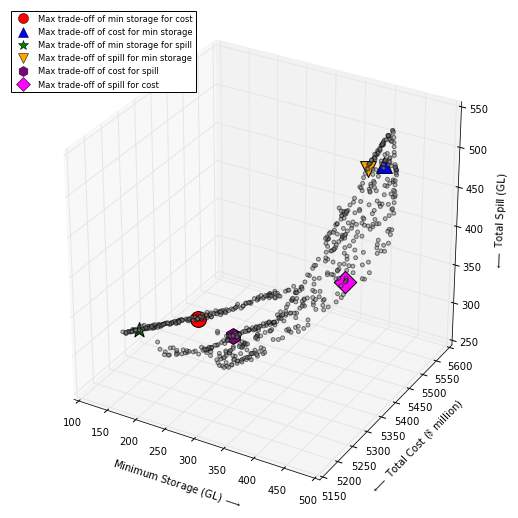

In [70]:
fig = plt.figure(figsize = [7,7])
ax = Axes3D(fig)

#create colorpool for plotting points of maximum tradeoff
cpool = ["red", "blue", "green", "orange", "purple", "magenta"]

#create markerpool for plotting points of maximum tradeoff
mpool = ['o','^','*','v','h','D']

#create pool of trade-off indices
tdpool = [tdminstorcost.name, tdcostminstor.name, tdminstorspill.name, 
          tdspillminstor.name, tdcostspill.name, tdspillcost.name]

#plot points as scatter diagram
ax.scatter(obj1, obj2, obj3, s = 60, c = "gray", marker = '.', alpha = 0.5)

#overplot points of maximum trade-off
for i in range(0, len(cpool)):
    ax.scatter(obj1.ix[tdpool[i]], obj2.ix[tdpool[i]], obj3.ix[tdpool[i]], s = 250, 
               c = cpool[i], marker = mpool[i])
    
ax.set_xlabel(obj1chartname, labelpad = 10)
ax.set_ylabel(obj2chartname, labelpad = 10)
ax.set_zlabel(obj3chartname, labelpad = 10)

# create legend
linepool = []
for i in range(0, len(cpool)):
    linepool.append(mpl.lines.Line2D([0],[0], marker = mpool[i], ms = 10, color = cpool[i], linestyle = 'none'))
    
namepool = ['Max trade-off of min storage for cost', 'Max trade-off of cost for min storage', 'Max trade-off of min storage for spill',
            'Max trade-off of spill for min storage', 'Max trade-off of cost for spill', 'Max trade-off of spill for cost']

ax.legend((linepool), (namepool), numpoints = 1, loc = 'upper left', fontsize = 'small')

#save file (check/uncheck to save)
#plt.savefig('Trade-off quantity/Tradeoff 3d scatterplot.png', dpi=150, bbox_inches = 'tight')
#plt.savefig('Trade-off quantity/Tradeoff 3d scatterplot.eps', bbox_inches = 'tight')

In [71]:
plt.close(fig)

Decision map highlighting options with highest trade-off for cost and minimum storage

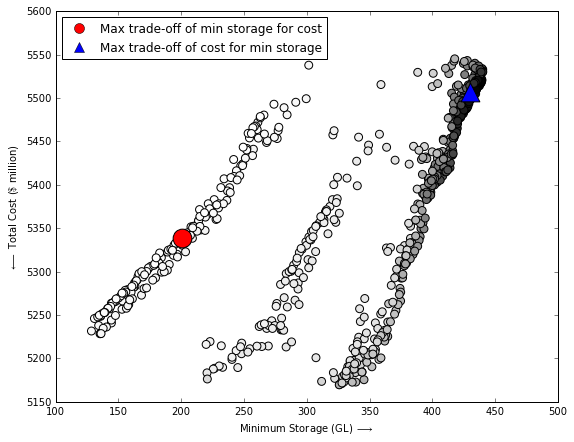

In [73]:
fig = plt.figure(figsize = [9,7])
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(obj1, obj2, c = onenormobj3, marker = '.', s = 250, cmap = 'gray')

#overplot the points of maximum trade-off of min storage for cost and cost for min storage
for i in range(0,2):
    ax1.scatter(obj1.ix[tdpool[i]], obj2.ix[tdpool[i]], c = cpool[i], marker = mpool[i], s = 350)

#set axis labels
ax1.set_xlabel(obj1chartname)
ax1.set_ylabel(obj2chartname)

ax1.legend((linepool[0:2]), (namepool[0:2]), numpoints = 1, loc = 'upper left')

#save file (check/uncheck to save)
#plt.savefig('Trade-off quantity/Tradeoff decision map minstor cost.png', dpi=150, bbox_inches = 'tight')

In [74]:
plt.close(fig)